# Садовников Алексей, вариант 2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# assessments.csv — этот файл содержит информацию об оценках в тесте. 
# Обычно каждый предмет в семестре включает ряд тестов с оценками, 
# за которыми следует заключительный экзаменационный тест (экзамен).

# code_module — идентификационный код предмета.

# code_presentation — семестр (Идентификационный код).

# id_assessment — тест (Идентификационный номер ассессмента).

# assessment_type — тип теста. Существуют три типа оценивания: 
#     оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

# date — информация об окончательной дате сдачи теста. 
# Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

# weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; 
# сумма всех остальных оценок составляет 100%.

df1 = pd.read_csv('assessments.csv')
df1.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [3]:
# courses.csv — файл содержит список предметов по семестрам.
# code_module — предмет (идентификационный код).

# code_presentation — семестр (идентификационный код).

# module_presentation_length — продолжительность семестра в днях.

df2 = pd.read_csv('courses.csv')
df2.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [4]:
# studentRegistration.csv — этот файл содержит информацию о времени, 
# когда студент зарегистрировался для прохождения курса в семестре.
# code_module — предмет (идентификационный код).

# code_presentation — семестр (идентификационный код)

# id_student — идентификационный номер студента.

# date_registration — дата регистрации студента. 
# Это количество дней, измеренное от начала семестра 
# (например, отрицательное значение -30 означает, 
#  что студент зарегистрировался на прохождение курса за 30 дней до его начала).

# date_unregistration — дата отмены регистрации студента с предмета. 
# У студентов, окончивших курс, это поле остается пустым.

df3 = pd.read_csv('studentRegistration.csv')
df3.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [5]:
# studentAssessment.csv — этот файл содержит результаты тестов студентов. 
# Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

# id_assessment — тест (идентификационный номер).

# id_student — идентификационный номер студента.

# date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

# is_banked — факт перезачета теста с прошлого семестра 
# (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

# score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. 
# Оценка ниже 40 неудачная/неуспешная сдача теста.

df4 = pd.read_csv('studentAssessment.csv')
df4.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


# №1. Сколько студентов успешно сдали только один курс?

In [50]:
# Объедениние таблицы об экзаменах и студентах
df_student_score = df4.merge(df1, how = 'left', on = 'id_assessment')
df_student_score.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [51]:
answer_1 = df_student_score \
    .query("assessment_type == 'Exam' and score >= 40 and is_banked == 0") \
    .groupby(by = ['id_student'], as_index = False) \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'count'}) \
    .query("count == 1") \
    .agg({'count' : 'count'})
answer_1

count    3802
dtype: int64

In [52]:
print('Cтудентов успешно сдали только один курс: ', answer_1[0])

Cтудентов успешно сдали только один курс:  3802


# №2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью

In [53]:
# Экзамен есть лишь у двух премдетов. По этой причине согласно условию "успешная сдача — это зачёт по курсу на экзамене"
# будем рассматривать только предметы  из списка ниже
df_exam_count = df_student_score \
    .query("assessment_type == 'Exam'") \
    .groupby(by = ['code_module'], as_index = False) \
    .agg({'id_student': 'count'}) \
    .rename(columns={'id_student': 'count'})
df_exam_count

,code_module,count
0,CCC,1915
1,DDD,3044


In [10]:
# Число сдавших экзамен
df_exam_pass = df_student_score \
    .query("assessment_type == 'Exam' and score >= 40") \
    .groupby(by = ['code_module'], as_index = False) \
    .agg({'id_student': 'count'}) \
    .rename(columns={'id_student': 'pass'})
df_exam_pass

,code_module,pass
0,CCC,1683
1,DDD,2709


In [11]:
df_exam_rate = df_exam_count[['code_module', 'count']]
df_exam_rate = df_exam_rate.merge(df_exam_pass)
df_exam_rate['exam_rate'] = (df_exam_rate['pass'] / df_exam_rate['count']).round(2)
df_exam_rate

,code_module,count,pass,exam_rate
0,CCC,1915,1683,0.88
1,DDD,3044,2709,0.89


In [12]:
#Самый простой курс 
answer_2_1 = df_exam_rate.sort_values(by = 'exam_rate', ascending = False).reset_index().head(1)
answer_2_1

,index,code_module,count,pass,exam_rate
0,1,DDD,3044,2709,0.89


In [13]:
print('Самый простой курс: ',answer_2_1['code_module'][0])

Самый простой курс:  DDD


In [14]:
#Самый сложный курс
answer_2_2 = df_exam_rate.sort_values(by = 'exam_rate', ascending = True).reset_index().head(1)
answer_2_2

,index,code_module,count,pass,exam_rate
0,0,CCC,1915,1683,0.88


In [15]:
print('Самый сложный курс: ',answer_2_2['code_module'][0])

Самый сложный курс:  CCC


# №3. По каждому предмету определи средний срок сдачи экзаменов

In [16]:
df_student_score.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [17]:
df_exam_time = df_student_score \
    .query("assessment_type == 'Exam'") \
    .groupby(by = ['code_module', 'id_student'], as_index = False) \
    .agg({'date_submitted': 'max'}) \
    .groupby(by = ['code_module', ], as_index = False) \
    .agg({'date_submitted': 'mean'}) \
    .rename(columns={'date_submitted': 'date_mean'})
df_exam_time.date_mean = df_exam_time.date_mean.round(2)
df_exam_time

,code_module,date_mean
0,CCC,239.41
1,DDD,237.91


# №4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). 

In [18]:
df3.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [19]:
# В случае повторной регистрации берем последнюю дату 
df_reg = df3 \
    .query("code_module == 'CCC' or code_module == 'DDD'") \
    .sort_values(by = ['id_student', 'date_registration']) \
    .drop_duplicates(subset = 'date_registration', keep = 'first') \
    .groupby(by = ['code_module', 'id_student'], as_index = False) \
    .agg({'date_registration': 'max', 'date_unregistration': 'max'}) 
df_reg.head()

,code_module,id_student,date_registration,date_unregistration
0,CCC,23698,-110.0,NaN
1,CCC,25261,-114.0,51.0
2,CCC,27116,-156.0,NaN
3,CCC,28418,-37.0,NaN
4,CCC,28787,-29.0,NaN


In [20]:
df_reg_info = df_reg \
    .groupby(by = ['code_module'], as_index = False) \
    .agg({'date_registration': 'count', 'date_unregistration': 'count'}) \
    .rename(columns={'date_registration': 'date_registration_count', 
                     'date_unregistration': 'date_unregistration_count'})
df_reg_info

,code_module,date_registration_count,date_unregistration_count
0,CCC,124,70
1,DDD,159,70


In [21]:
# Топ-3 по регистрации
df_reg_info \
    .sort_values(by = 'date_registration_count', ascending = False) \
    .head(3)

,code_module,date_registration_count,date_unregistration_count
1,DDD,159,70
0,CCC,124,70


In [54]:
# Топ-3 по оттоку
df_reg_info \
    .sort_values(by = 'date_unregistration_count', ascending = False) \
    .head(3)

,code_module,date_registration_count,date_unregistration_count
0,CCC,124,70
1,DDD,159,70


# №5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  

In [23]:
df_student_score.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [24]:
df_exam_count_sem = df_student_score \
    .query("assessment_type == 'Exam'") \
    .groupby(by = ['code_presentation'], as_index = False) \
    .agg({'id_student': 'count'}) \
    .rename(columns={'id_student': 'count'})
df_exam_count_sem

,code_presentation,count
0,2013B,602
1,2013J,968
2,2014B,1271
3,2014J,2118


In [25]:
# Число сдавших экзамен
df_exam_pass_sem = df_student_score \
    .query("assessment_type == 'Exam' and score >= 40") \
    .groupby(by = ['code_presentation'], as_index = False) \
    .agg({'id_student': 'count'}) \
    .rename(columns={'id_student': 'pass'})
df_exam_pass_sem

,code_presentation,pass
0,2013B,504
1,2013J,878
2,2014B,1149
3,2014J,1861


In [26]:
df_exam_rate_sem = df_exam_count_sem[['code_presentation', 'count']]
df_exam_rate_sem = df_exam_rate_sem.merge(df_exam_pass_sem)
df_exam_rate_sem['exam_rate'] = (df_exam_rate_sem['pass'] / df_exam_rate_sem['count']).round(2)
df_exam_rate_sem

,code_presentation,count,pass,exam_rate
0,2013B,602,504,0.84
1,2013J,968,878,0.91
2,2014B,1271,1149,0.90
3,2014J,2118,1861,0.88


In [27]:
df_exam_time_sem = df_student_score \
    .query("assessment_type == 'Exam'") \
    .groupby(by = ['code_presentation','id_student'], as_index = False) \
    .agg({'date_submitted': 'max'}) \
    .groupby(by = ['code_presentation'], as_index = False) \
    .agg({'date_submitted': 'mean'}) \
    .rename(columns={'date_submitted': 'date_mean'})
df_exam_time_sem.date_mean = df_exam_time_sem.date_mean.round(2)
df_exam_time_sem

,code_presentation,date_mean
0,2013B,230.18
1,2013J,239.51
2,2014B,233.00
3,2014J,243.70


In [28]:
df_exam_rate_sem = df_exam_rate_sem.merge(df_exam_time_sem)
df_exam_rate_sem

,code_presentation,count,pass,exam_rate,date_mean
0,2013B,602,504,0.84,230.18
1,2013J,968,878,0.91,239.51
2,2014B,1271,1149,0.90,233.00
3,2014J,2118,1861,0.88,243.70


In [29]:
answer_5_1 = df_exam_rate_sem.sort_values(by = 'exam_rate').reset_index().head(1)
answer_5_2 = df_exam_rate_sem.sort_values(by = 'date_mean', ascending = False).reset_index().head(1)
print('Cеместр с самой низкой завершаемостью курсов: ',answer_5_1['code_presentation'][0])
print('Cеместр c самыми долгими средними сроками сдачи курсов: ',answer_5_2['code_presentation'][0])

Cеместр с самой низкой завершаемостью курсов:  2013B
Cеместр c самыми долгими средними сроками сдачи курсов:  2014J


# №6. RFM

In [30]:
df_student_score.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [55]:
# Что должно считаться курсом?
df_rfm_analyse = df_student_score \
    .query("(code_module == 'CCC') or (code_module == 'DDD')") \
    .query("assessment_type == 'Exam'") \
    .query("is_banked == 0") 
df_rfm_analyse.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0


In [32]:
df_rfm_analyse_try = df_rfm_analyse \
    .groupby(by = ["id_student", "code_module", 'code_presentation'], as_index = False) \
    .agg({'score': 'count'})  \
    .groupby(by = ["id_student"], as_index = False) \
    .agg({'score': 'count'})  \
    .rename(columns = {'score': 'tries'}) \
    .query("tries == 2")
df_rfm_analyse_try.head()

,id_student,tries
72,80329,2
74,80868,2
102,105523,2
122,123598,2
125,126394,2


In [33]:
df_rfm_analyse_pass = df_rfm_analyse \
    .query("score >= 40") \
    .groupby(by = ["id_student", "code_module", 'code_presentation'], as_index = False) \
    .agg({'score': 'count'})  \
    .groupby(by = ["id_student"], as_index = False) \
    .agg({'score': 'count'})  \
    .rename(columns = {'score': 'pass'}) 
df_rfm_analyse_pass.head()

,id_student,pass
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


In [34]:
df_RFM = df_rfm_analyse_try.merge(df_rfm_analyse_pass, on = 'id_student', how = 'left')
df_RFM['pass'] = df_RFM['pass'].fillna(0)
df_RFM['Frequency'] = df_RFM['pass'] / df_RFM['tries']
df_RFM.head()

,id_student,tries,pass,Frequency
0,80329,2,2.0,1.0
1,80868,2,2.0,1.0
2,105523,2,2.0,1.0
3,123598,2,2.0,1.0
4,126394,2,2.0,1.0


In [35]:
df_RFM.query('Frequency != 1')

,id_student,tries,pass,Frequency
7,145114,2,1.0,0.5
13,240486,2,1.0,0.5
24,317801,2,1.0,0.5
29,356297,2,1.0,0.5
42,440103,2,1.0,0.5
46,465843,2,1.0,0.5
55,500006,2,1.0,0.5
67,527323,2,0.0,0.0
70,529078,2,1.0,0.5
74,535161,2,1.0,0.5


In [36]:
df_rfm_analyse.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0


In [37]:
df_Recency = df_rfm_analyse \
    .groupby("id_student", as_index = False) \
    .agg({'date_submitted' : 'mean'}) \
    .rename(columns = {'date_submitted': 'Recency'})
df_Recency.head()

,id_student,Recency
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0


In [38]:
df_RFM = df_RFM.merge(df_Recency, on = 'id_student', how = 'left')
df_RFM.head()

,id_student,tries,pass,Frequency,Recency
0,80329,2,2.0,1.0,243.5
1,80868,2,2.0,1.0,240.5
2,105523,2,2.0,1.0,239.0
3,123598,2,2.0,1.0,243.0
4,126394,2,2.0,1.0,237.5


In [39]:
df_rfm_analyse.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0


In [40]:
df_Monetary = df_rfm_analyse \
    .groupby("id_student", as_index = False) \
    .agg({'score' : 'mean'}) \
    .rename(columns = {'score': 'Monetary'})
df_Monetary.head()

,id_student,Monetary
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0


In [41]:
df_RFM = df_RFM.merge(df_Monetary, on = 'id_student', how = 'left')
df_RFM.head()

,id_student,tries,pass,Frequency,Recency,Monetary
0,80329,2,2.0,1.0,243.5,72.0
1,80868,2,2.0,1.0,240.5,64.0
2,105523,2,2.0,1.0,239.0,56.5
3,123598,2,2.0,1.0,243.0,79.0
4,126394,2,2.0,1.0,237.5,79.0


In [42]:
df_RFM.Frequency.unique()

array([1. , 0.5, 0. ])

In [43]:
quintiles = df_RFM[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 233.5, 0.4: 239.0, 0.6: 240.5, 0.8: 243.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 56.0, 0.4: 67.0, 0.6: 79.0, 0.8: 88.5}}

In [44]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def f_score(x, c):
    if x == 0:
        return 1
    elif x == 0.5:
        return 3
#     elif x <= quintiles[c][.6]:
#         return 3
#     elif x <= quintiles[c][.8]:
#         return 4
    else:
        return 5
    
def m_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [45]:
df_RFM['R'] = df_RFM['Recency'].apply(lambda x: r_score(x))
df_RFM['F'] = df_RFM['Frequency'].apply(lambda x: f_score(x, 'Frequency'))
df_RFM['M'] = df_RFM['Monetary'].apply(lambda x: m_score(x, 'Monetary'))

In [46]:
df_RFM['RFM Score'] = df_RFM['R'].map(str) + df_RFM['F'].map(str) + df_RFM['M'].map(str)
df_RFM.head()

,id_student,tries,pass,Frequency,Recency,Monetary,R,F,M,RFM Score
0,80329,2,2.0,1.0,243.5,72.0,1,5,3,153
1,80868,2,2.0,1.0,240.5,64.0,3,5,2,352
2,105523,2,2.0,1.0,239.0,56.5,4,5,2,452
3,123598,2,2.0,1.0,243.0,79.0,2,5,3,253
4,126394,2,2.0,1.0,237.5,79.0,4,5,3,453


In [47]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

df_RFM['Segment'] = df_RFM['R'].map(str) + df_RFM['F'].map(str)
df_RFM['Segment'] = df_RFM['Segment'].replace(segt_map, regex=True)
df_RFM.head()

,id_student,tries,pass,Frequency,Recency,Monetary,R,F,M,RFM Score,Segment
0,80329,2,2.0,1.0,243.5,72.0,1,5,3,153,can't loose
1,80868,2,2.0,1.0,240.5,64.0,3,5,2,352,loyal customers
2,105523,2,2.0,1.0,239.0,56.5,4,5,2,452,loyal customers
3,123598,2,2.0,1.0,243.0,79.0,2,5,3,253,can't loose
4,126394,2,2.0,1.0,237.5,79.0,4,5,3,453,loyal customers


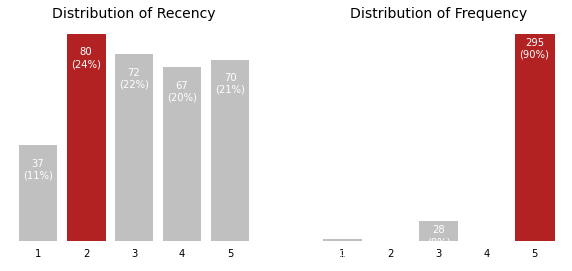

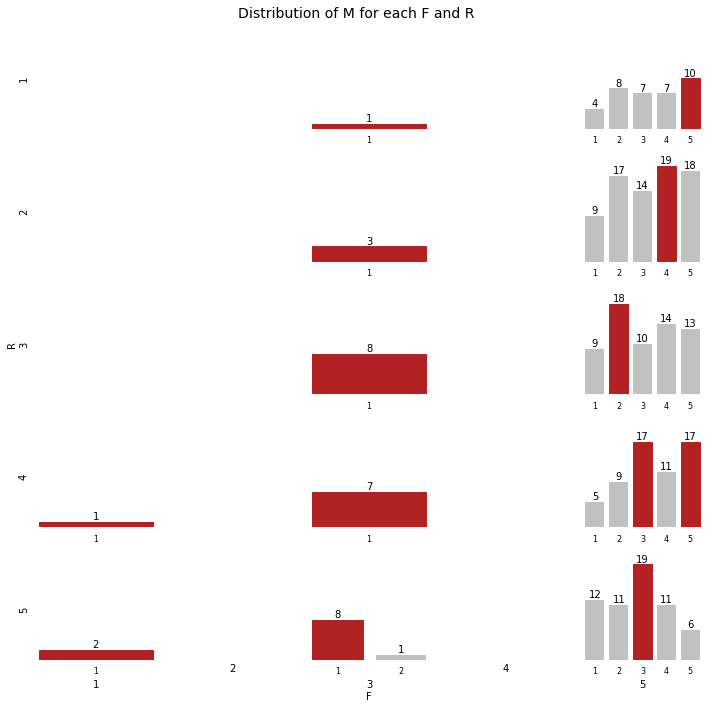

In [48]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = df_RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = df_RFM[(df_RFM['R'] == r) & (df_RFM['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

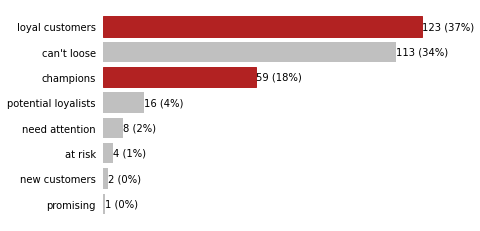

In [49]:
# count the number of customers in each segment
segments_counts = df_RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()